In [1]:
import pandas as pd
import numpy as np

import geopandas as gpd
import branca.colormap as cm
import folium
from folium.plugins import TimeSliderChoropleth

%matplotlib inline

In [2]:
GOOGLE_DRIVE_BASE_PATH = "/content/drive/MyDrive/"
user = "Matthew"

if user == "Julia":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
elif user == "Matthew":
    DATA_PATH = "/Users/mdong/dataScience/projects-ml/ca-waste/" + "data/"
#     DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "Sustainability/ER131-Project/" + "data/"
elif user == "Samadi":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
elif user == "Shaye":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
    
print("User: {}\nPath to data: {}".format(user, DATA_PATH))

User: Matthew
Path to data: /Users/mdong/dataScience/projects-ml/ca-waste/data/


In [3]:
counties = gpd.read_file("../data/geospatial-data/CA_Counties_TIGER2016.shp") #YOUR CODE HERE

counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


In [4]:
counties.shape

(58, 18)

In [5]:
len(counties.NAME.unique())

58

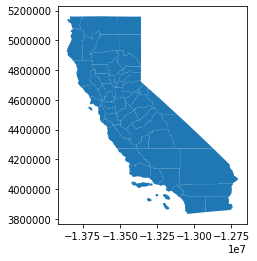

In [6]:
counties.plot()

In [7]:
county_shapes = counties[["NAME", "geometry"]]
county_shapes.rename(columns={"NAME":"County"}, inplace=True)
county_shapes.head()

/Users/mdong/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,County,geometry
0,Sierra,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,Sacramento,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,Santa Barbara,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,Calaveras,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,Ventura,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


In [42]:
complete_feature_df = pd.read_csv(DATA_PATH + "complete_feature_df.csv")
complete_feature_df.head()

,Year,Waste Produced (Tons),County,Population,Electricity Usage (GWh)
0,2000.0,1762385.98,San Bernardino,1710139.0,3950.485414
1,2001.0,1888556.78,San Bernardino,1741416.0,3717.427367
2,2002.0,1931424.51,San Bernardino,1782268.0,3817.733496
3,2003.0,2107128.88,San Bernardino,1825379.0,4251.079140
4,2004.0,2235251.83,San Bernardino,1875063.0,5044.577708


In [43]:
complete_feature_df["Waste Produced (Tons)"] = np.log(complete_feature_df["Waste Produced (Tons)"])

In [46]:
complete_feature_df["ModifiedTime"] = pd.to_datetime(complete_feature_df['Year'], format="%Y") + pd.Timedelta(days=1)
complete_feature_df["ModifiedTime"] = (complete_feature_df["ModifiedTime"].astype(int) // 10**9).astype('U10')
complete_feature_df.head(2)

,Year,Waste Produced (Tons),County,Population,Electricity Usage (GWh),ModifiedTime
0,2000-01-01,14.382179,San Bernardino,1710139.0,3950.485414,946771200
1,2001-01-01,14.451323,San Bernardino,1741416.0,3717.427367,978393600


In [11]:
len(complete_feature_df.County.unique())

57

In [47]:
complete_feature_gdf = complete_feature_df.merge(county_shapes, on="County", how="inner")
# complete_feature_gdf = county_shapes.merge(complete_feature_df, on="County", how="inner")
complete_feature_gdf = complete_feature_gdf[["ModifiedTime", "County", "Waste Produced (Tons)", "geometry"]]
complete_feature_gdf.head()

,ModifiedTime,County,Waste Produced (Tons),geometry
0,946771200,Sierra,7.944492,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,978393600,Sierra,7.908839,"POLYGON ((-13431319.751 4821511.426, -13431312..."
2,1009929600,Sierra,7.775859,"POLYGON ((-13431319.751 4821511.426, -13431312..."
3,1041465600,Sierra,7.940228,"POLYGON ((-13431319.751 4821511.426, -13431312..."
4,1073001600,Sierra,7.778170,"POLYGON ((-13431319.751 4821511.426, -13431312..."


In [13]:
complete_feature_gdf.shape

(1130, 4)

In [48]:
max_colour = max(complete_feature_gdf['Waste Produced (Tons)'])
min_colour = min(complete_feature_gdf['Waste Produced (Tons)'])
cmap = cm.linear.YlOrRd_09.scale(min_colour, max_colour)
complete_feature_gdf['color'] = complete_feature_gdf['Waste Produced (Tons)'].map(cmap)
complete_feature_gdf.head()

,ModifiedTime,County,Waste Produced (Tons),geometry,color
0,946771200,Sierra,7.944492,"POLYGON ((-13431319.751 4821511.426, -13431312...",#fe9a41ff
1,978393600,Sierra,7.908839,"POLYGON ((-13431319.751 4821511.426, -13431312...",#fe9a42ff
2,1009929600,Sierra,7.775859,"POLYGON ((-13431319.751 4821511.426, -13431312...",#fe9d43ff
3,1041465600,Sierra,7.940228,"POLYGON ((-13431319.751 4821511.426, -13431312...",#fe9a41ff
4,1073001600,Sierra,7.778170,"POLYGON ((-13431319.751 4821511.426, -13431312...",#fe9d43ff


In [49]:
# county_list = complete_feature_gdf['County'].unique().tolist()
# county_idx = range(len(county_list))
# style_data = {}

# for idx in county_idx:
#     county = county_list[idx]
# #     print(idx, county)
#     county_df = complete_feature_gdf[complete_feature_gdf.County == county]
#     choropleth_info = {}
#     for _, row in county_df.iterrows():
#         year, color, opacity = row["Year"], row["color"], 0.7
#         choropleth_info[year] = {"color": color, "opacity": opacity}
#     style_data[str(idx)] = choropleth_info

In [51]:
style_data = {}
for idx, row in complete_feature_gdf.iterrows():
    county = row["County"]
    county_df = complete_feature_gdf[complete_feature_gdf.County == county]
    choropleth_info = {}
    for idx, row in county_df.iterrows():
        year, color, opacity = row["ModifiedTime"], row["color"], 0.7
        choropleth_info[year] = {"color": color, "opacity": opacity}
    style_data[county] = choropleth_info

In [52]:
len(style_data.keys())

57

In [55]:
style_data.keys()

dict_keys(['Sierra', 'Sacramento', 'Santa Barbara', 'Calaveras', 'Ventura', 'Los Angeles', 'Sonoma', 'Kings', 'San Diego', 'Placer', 'San Francisco', 'Marin', 'Mariposa', 'Lassen', 'Napa', 'Shasta', 'Monterey', 'Trinity', 'Mendocino', 'Inyo', 'Mono', 'Tuolumne', 'Solano', 'San Bernardino', 'Contra Costa', 'Alpine', 'El Dorado', 'Yolo', 'Yuba', 'San Benito', 'Humboldt', 'Riverside', 'Kern', 'Colusa', 'Del Norte', 'Modoc', 'Fresno', 'Madera', 'Santa Clara', 'Tehama', 'San Joaquin', 'Alameda', 'Nevada', 'Butte', 'Merced', 'Tulare', 'Stanislaus', 'Orange', 'Imperial', 'Amador', 'Lake', 'Plumas', 'San Mateo', 'Siskiyou', 'Santa Cruz', 'Glenn', 'San Luis Obispo'])

In [54]:
style_data.get("Orange")

{'946771200': {'color': '#a70026ff', 'opacity': 0.7},
 '978393600': {'color': '#a70026ff', 'opacity': 0.7},
 '1009929600': {'color': '#a70026ff', 'opacity': 0.7},
 '1041465600': {'color': '#a60026ff', 'opacity': 0.7},
 '1073001600': {'color': '#a40026ff', 'opacity': 0.7},
 '1104624000': {'color': '#a30026ff', 'opacity': 0.7},
 '1136160000': {'color': '#a70026ff', 'opacity': 0.7},
 '1167696000': {'color': '#a90026ff', 'opacity': 0.7},
 '1199232000': {'color': '#ad0026ff', 'opacity': 0.7},
 '1230854400': {'color': '#b00026ff', 'opacity': 0.7},
 '1262390400': {'color': '#b10026ff', 'opacity': 0.7},
 '1293926400': {'color': '#b20026ff', 'opacity': 0.7},
 '1325462400': {'color': '#b20026ff', 'opacity': 0.7},
 '1357084800': {'color': '#b10026ff', 'opacity': 0.7},
 '1388620800': {'color': '#b00026ff', 'opacity': 0.7},
 '1420156800': {'color': '#af0026ff', 'opacity': 0.7},
 '1451692800': {'color': '#ae0026ff', 'opacity': 0.7},
 '1483315200': {'color': '#ac0026ff', 'opacity': 0.7},
 '1514851200

In [20]:
# county_shapes = complete_feature_gdf[['geometry']]
# county_shapes = gpd.GeoDataFrame(county_shapes)
# county_shapes = county_shapes.drop_duplicates().reset_index(drop=True)
# county_shapes

In [21]:
# import json
# geojson = county_shapes.to_json()
# geojson = json.loads(geojson)
# geojson.keys()

In [22]:
# for feature in geojson["features"]:
#     print(feature["prop"])

In [23]:
# complete_feature_gdf.to_json()

In [56]:
complete_feature_gdf.head()

,ModifiedTime,County,Waste Produced (Tons),geometry,color
0,946771200,Sierra,7.944492,"POLYGON ((-13431319.751 4821511.426, -13431312...",#fe9a41ff
1,978393600,Sierra,7.908839,"POLYGON ((-13431319.751 4821511.426, -13431312...",#fe9a42ff
2,1009929600,Sierra,7.775859,"POLYGON ((-13431319.751 4821511.426, -13431312...",#fe9d43ff
3,1041465600,Sierra,7.940228,"POLYGON ((-13431319.751 4821511.426, -13431312...",#fe9a41ff
4,1073001600,Sierra,7.778170,"POLYGON ((-13431319.751 4821511.426, -13431312...",#fe9d43ff


In [57]:
ca_counties_geojson = DATA_PATH + "geospatial-data/ca-counties.geojson"

SF_COORDINATES = (37.76, -122.45)
m = folium.Map(location=SF_COORDINATES, zoom_start=6, tiles='cartodbpositron')

# m.choropleth(
#     geo_data=ca_counties_geojson,
#     data=complete_feature_gdf,
#     columns=['Year', 'Waste Produced (Tons)'],
#     key_on='feature.id',
#     fill_color= 'BuPu',
#     fill_opacity=0.7,
#     legend_name='Waste'
# )

folium.Choropleth(
    geo_data=ca_counties_geojson,
    data=complete_feature_gdf,
    columns=['County', 'Waste Produced (Tons)'],
    key_on='feature.properties.name',
    fill_color='BuPu'
).add_to(m)

m

In [58]:
SF_COORDINATES = (37.76, -122.45)
ca_waste_map = folium.Map(location=SF_COORDINATES, zoom_start=6, tiles='cartodbpositron')

TimeSliderChoropleth(
    data=ca_counties_geojson,
    styledict=style_data,
).add_to(ca_waste_map)

cmap.add_to(ca_waste_map)

# ca_waste_map.save(outfile=DATA_PATH + 'TimeSliderChoropleth.html')
ca_waste_map